6-2실습이랑 똑같음

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image

import pandas as pd
import numpy as np

import pydotplus

import os

In [44]:
tennis_data = pd.read_csv('playtennis.csv')
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [45]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)

tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 3)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 4)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 5)

tennis_data.Humidity = tennis_data.Humidity.replace('High', 6)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 7)

tennis_data.Wind = tennis_data.Wind.replace('Weak', 8)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 9)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 10)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 11)

tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


In [46]:
X = np.array(pd.DataFrame(tennis_data, columns = \
                          ['Outlook', 'Temperature', 'Humidity', 'Wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis']))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [48]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)

In [49]:
dt_prediction = dt_clf.predict(X_test)

In [50]:
print(confusion_matrix(y_test, dt_prediction))

[[1 0]
 [2 1]]


In [51]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

          10       0.33      1.00      0.50         1
          11       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [52]:
from sklearn import tree

In [53]:
os.environ['PATH']+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [54]:
feature_names=tennis_data.columns.tolist()
feature_names=feature_names[0:4]
feature_names

['Outlook', 'Temperature', 'Humidity', 'Wind']

In [55]:
target_name=np.array(['Play No','Play Yes'])

In [57]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None, 
                                   feature_names = feature_names,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)

In [58]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

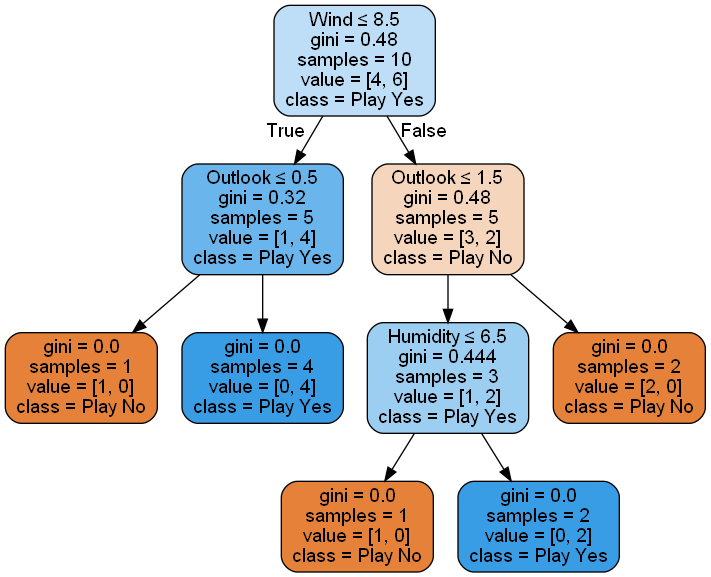

In [59]:
Image(dt_graph.create_png())